In [1]:
%cd ..

/home/datvodinh/Documents/Github/deep-learning-exercise


In [2]:
from src.neopolyp.dataset.dataset import NeoPolypDataset
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = NeoPolypDataset(session="train", path="data")

In [4]:
sample = dataset[0]

In [5]:
sample['mask'].shape, sample['image'].shape

(torch.Size([1, 256, 256]), torch.Size([3, 256, 256]))

In [6]:
sample['mask'].squeeze().long().max()

tensor(2)

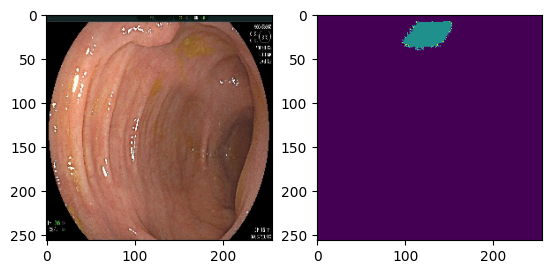

In [7]:
plt.subplot(1,2,1)
plt.imshow(sample['image'].permute(1,2,0))
plt.subplot(1,2,2)
plt.imshow(sample['mask'].permute(1,2,0))

In [8]:
print(sample['image'].max(), sample['image'].min())
print(sample['mask'].max(), sample['mask'].min())

tensor(1., dtype=torch.float64) tensor(0., dtype=torch.float64)
tensor(2, dtype=torch.uint8) tensor(0, dtype=torch.uint8)


In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F


def one_hot(labels: torch.Tensor,
            num_classes: int,
            eps: float = 1e-6
            ) -> torch.Tensor:
    r"""Converts an integer label 2D tensor to a one-hot 3D tensor.
        Label: (N, H, W) -> Onehot: (N, C, H, W)
    """
    batch_size, height, width = labels.shape
    one_hot = torch.zeros(batch_size, num_classes, height, width)
    return one_hot.scatter_(1, labels.unsqueeze(1), 1.0) + eps

In [10]:
o_hot = one_hot(sample['mask'].long(), 3,eps=0).squeeze().permute(1,2,0)

In [11]:
o_hot.shape

torch.Size([256, 256, 3])

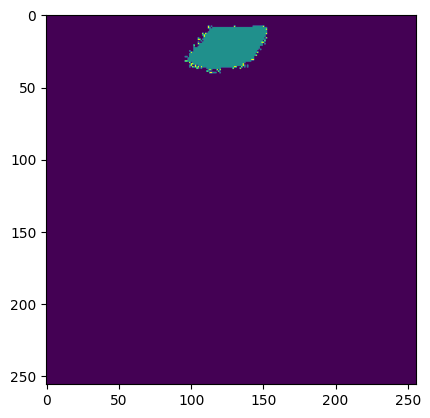

In [12]:
plt.imshow(o_hot.argmax(dim=-1))